DISCLAIMER: This homework was done on Google collab with permission from the instructor. However, let it be known that Google collab has an auto fill feature (similar to that of Gmail autofill or on Google docs where it finishes sentences for you), which could autofill the code. I wasn't able to find the setting to turn it off, however, I tried my best to adhere to the academic honesty policies. Wherever autofill was used, I have cited it, but also primarily because it made sense to do the code that way.
However, all points of academic honesty was honored.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from PIL import Image
from sklearn.metrics import mean_squared_error
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

random_state = 42

## 1. K-means clustering

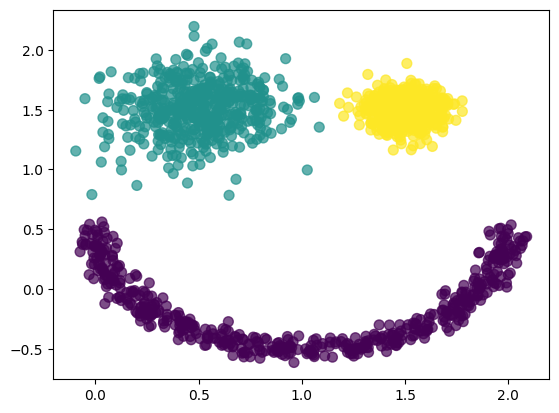

In [ ]:
# Create a toy dataset with 2D points
def make_face():
    X1, X1_labels = make_moons(n_samples=1000, noise=0.05)
    X1 = X1[X1_labels == 1]
    X2, _= make_blobs(n_samples=500, centers=[[0.5, 1.5]], cluster_std=0.2)
    X3, _= make_blobs(n_samples=500, centers=[[1.5, 1.5]], cluster_std=0.1)
    X = np.vstack((X1, X2, X3))
    labels_true = [[0] * 500, [1] * 500, [2] * 500]
    return X, labels_true

X, labels_true = make_face()
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', marker='o', s=50, alpha=0.7)
plt.show()

a. (1 point) Implement the K-means clustering algorithm using Euclidean distance. The number of clusters, K, should be a parameter, and it determines the number of clusters to form as well as the number of centroids to use. Initialize the cluster centroids randomly.

In [ ]:
# Implement kmeans algorithm here
def kmeans(X, K, max_iters = 25, visualize=False ,seed=random_state): # ,max_iters=100,tol=1e-4,
    np.random.seed(seed)
    samp, throwaway = X.shape
    centroids = X[np.random.choice(samp, K, replace=False)]   #we don't want any repeat, so replace is false
    loss_history = []
    for iteration in range(max_iters): #max_iters
        points = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        if visualize:
            plt.figure()
            plt.scatter(X[:, 0], X[:, 1], c=points, cmap='viridis', s=20)
            plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids')
            plt.title(f"K-means Iteration {iteration + 1}")
            plt.legend()
        new_centroids = []
        for k in range(K):
            cluster_points = X[points == k]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                new_centroids.append(centroids[k])
        new_centroids = np.array(new_centroids)
        loss = 0
        for i in range(samp):
            distance = np.linalg.norm(X[i] - centroids[points[i]])
            loss += distance ** 2
        loss_history.append(loss)
        #if np.linalg.norm(new_centroids - centroids) < (0.0001):#Very Important for convergence
            #break
        centroids = new_centroids
    return centroids, points, loss_history

#Reference: https://medium.com/@amit25173/k-means-clustering-pseudocode-and-implementation-c8027bf3de66
#Reference: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/cluster/_kmeans.py
#Reference: https://giogiac.hashnode.dev/k-means-algorithm-from-scratch

b. (0.5 points) Run K-means on a 2D toy dataset with K=3 (the actual number of clusters). The code for generating the synthetic dataset can be found in the provided skeleton code. Visualize the clustering results for the first 25 iterations. Plot the loss value versus the number of iterations.

<ipython-input-20-68889d1eae02>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Text(0, 0.5, 'Loss')

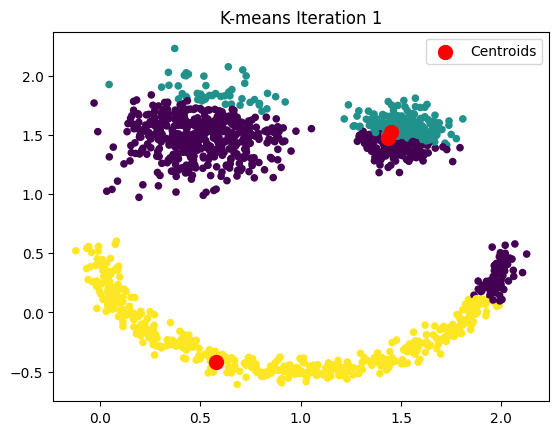

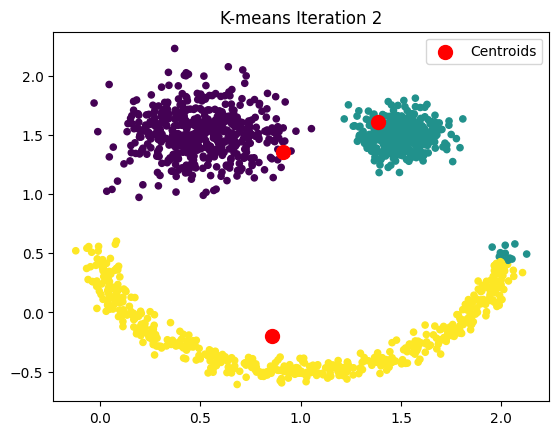

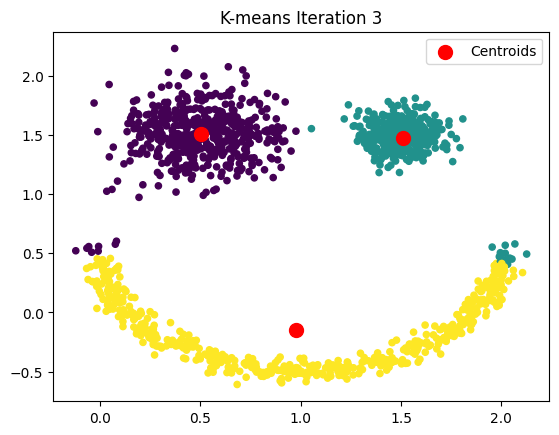

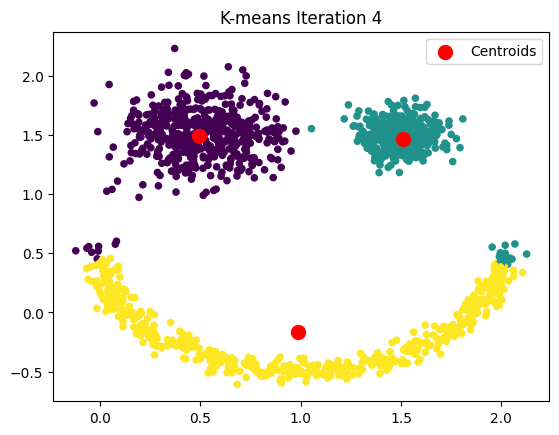

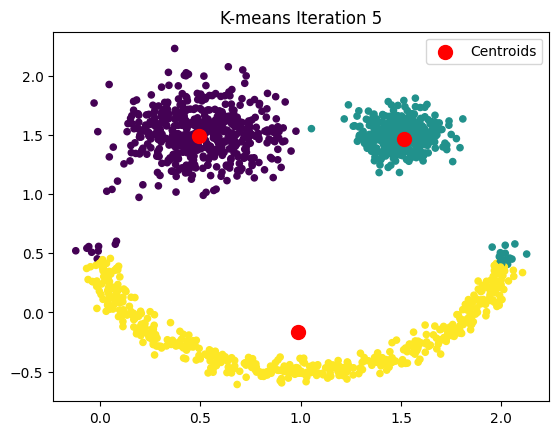

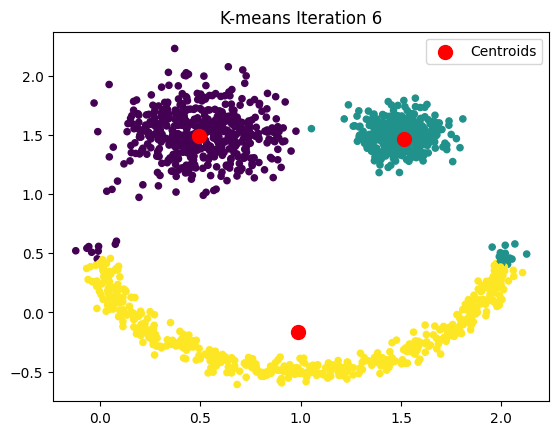

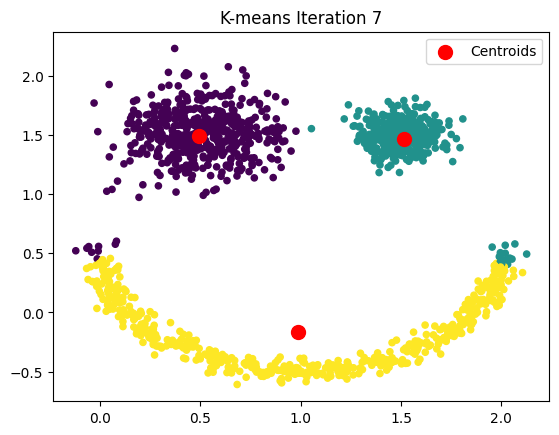

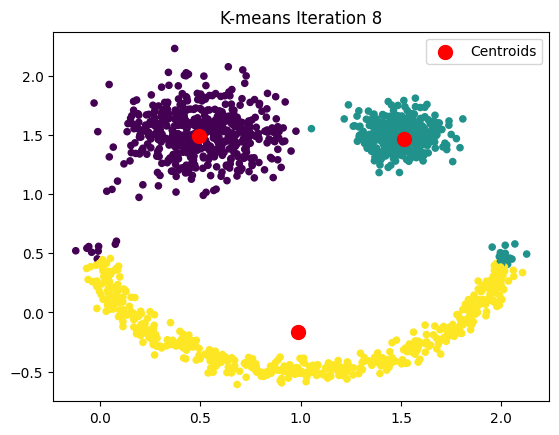

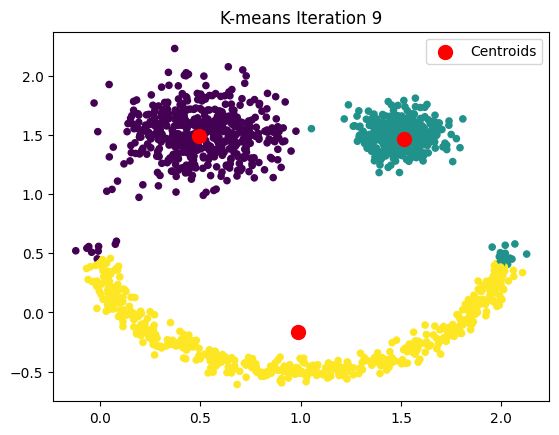

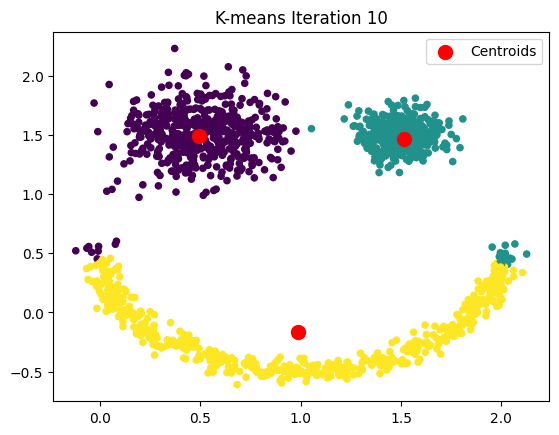

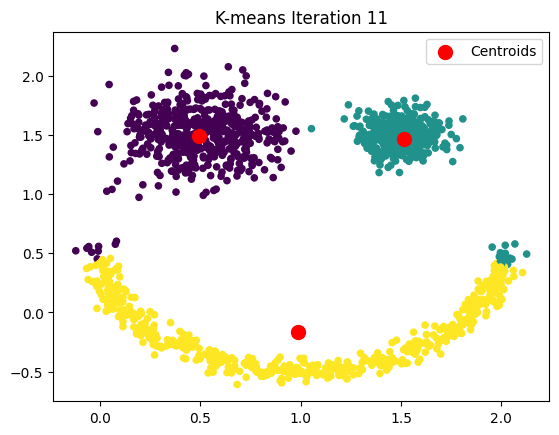

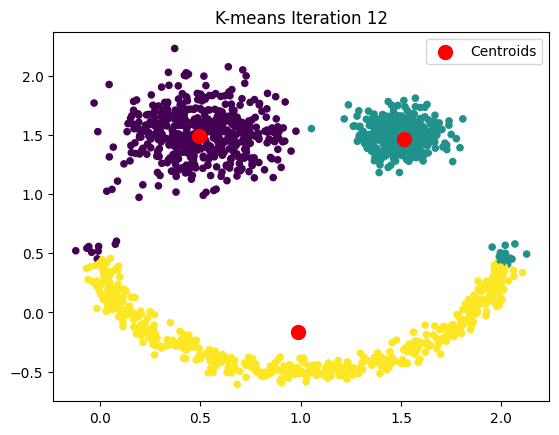

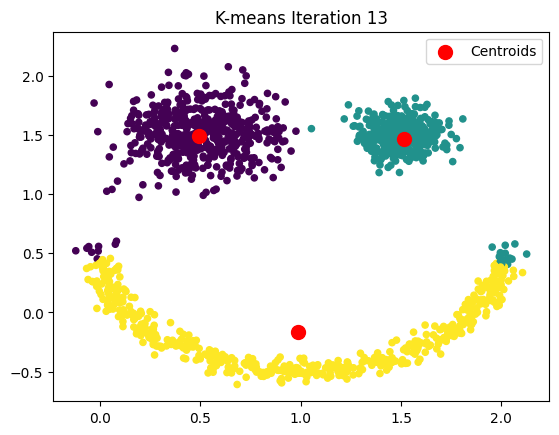

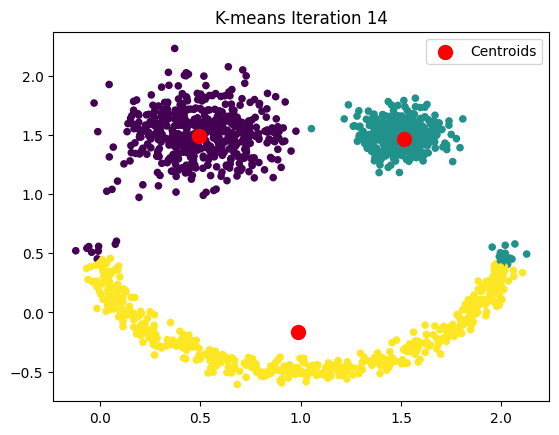

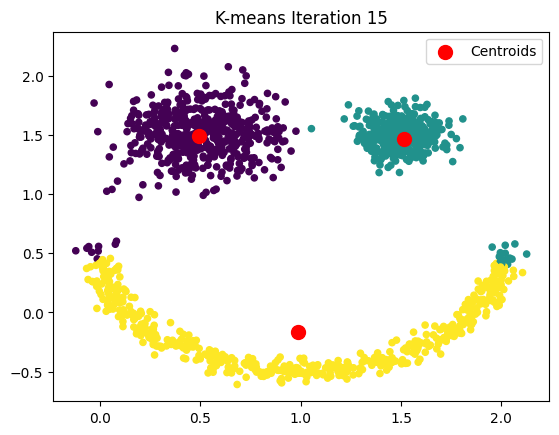

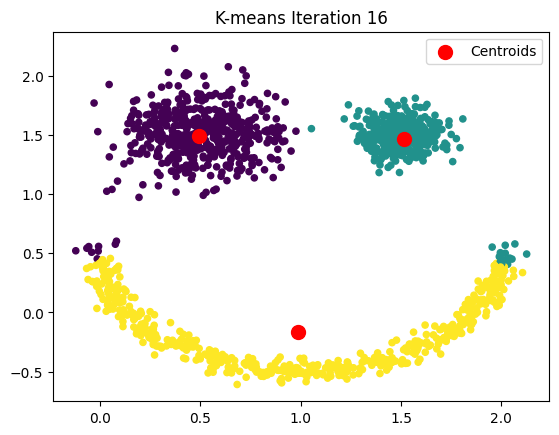

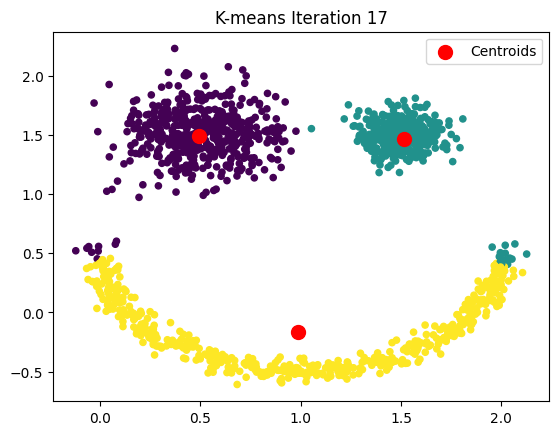

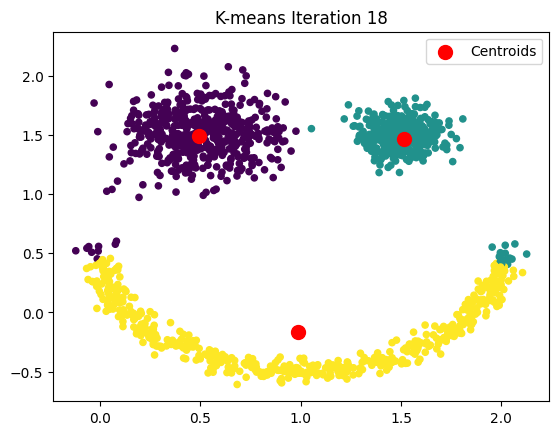

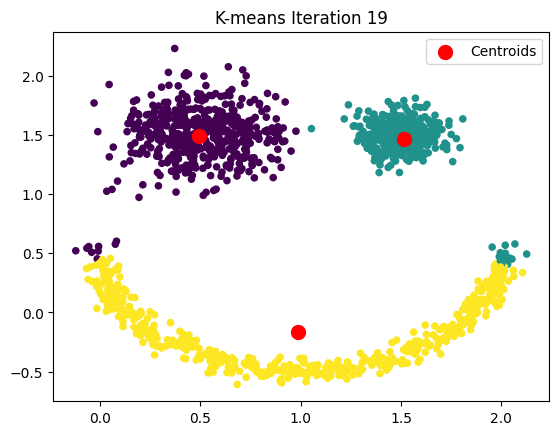

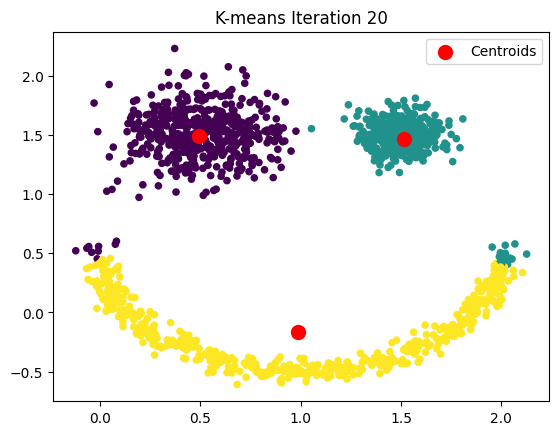

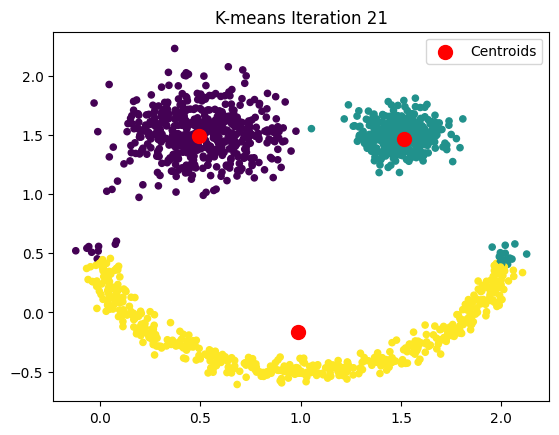

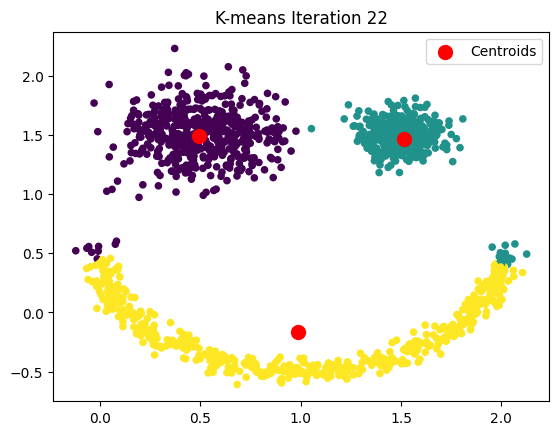

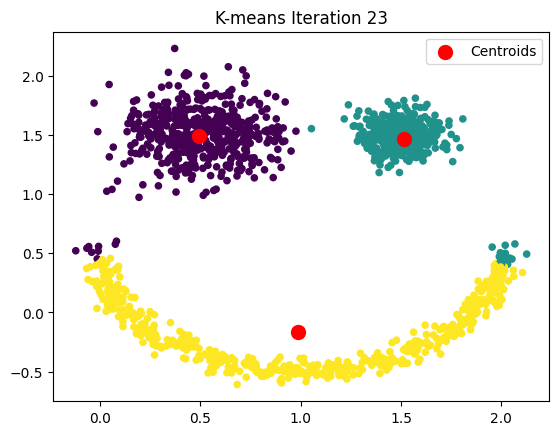

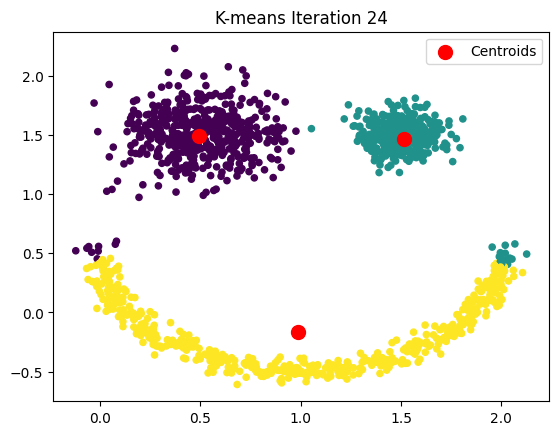

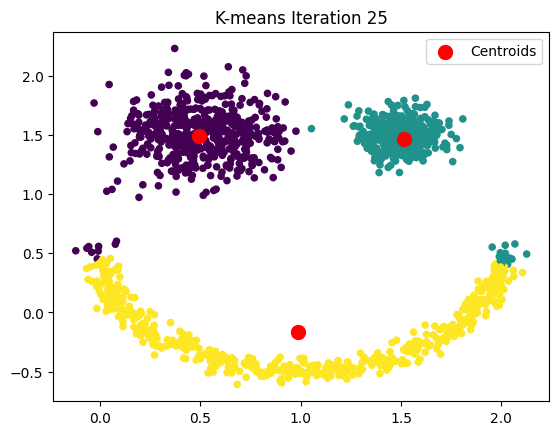

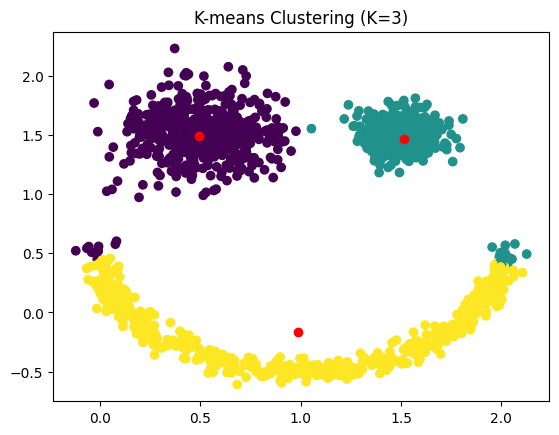

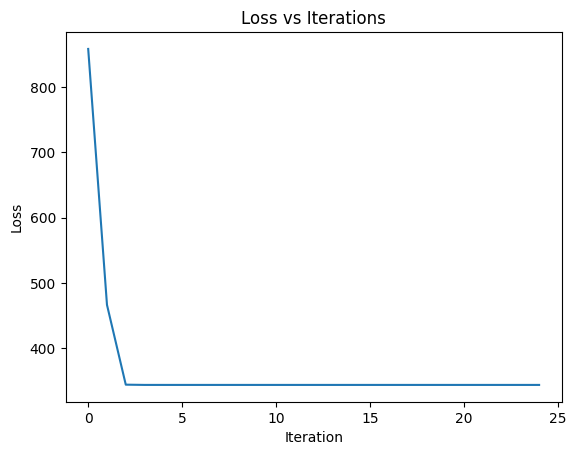

In [ ]:
# Run K-means on the 2D toy dataset with K=3, visualize the clustering result, and plot the loss versus number of iterations.
centroids, labels, loss_history = kmeans(X, K = 3, max_iters=25, visualize= True)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.title('K-means Clustering (K=3)')
plt.figure()
plt.plot(loss_history)
plt.title('Loss vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')

c. (1 point) Run K-means on the toy dataset using different K values. Visualize the final clustering results for each K value and discuss the differences. Plot a curve about the final loss versus K. Based on this curve, discuss which value of K seems most suitable.

Text(0.5, 1.0, 'Elbow Method')

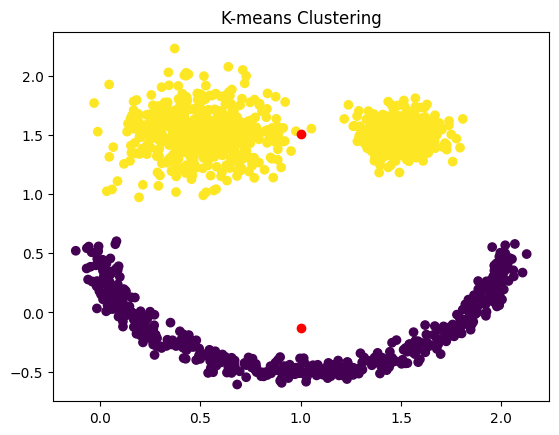

<Figure size 640x480 with 0 Axes>

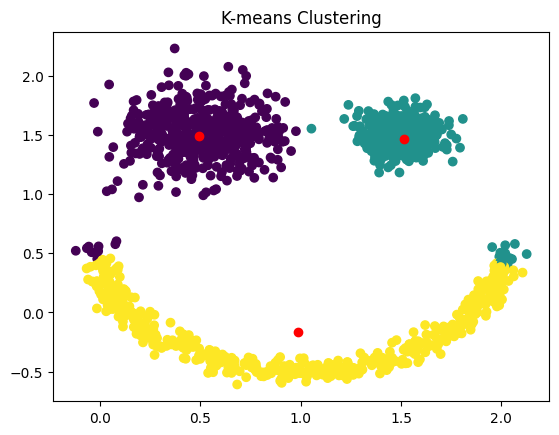

<Figure size 640x480 with 0 Axes>

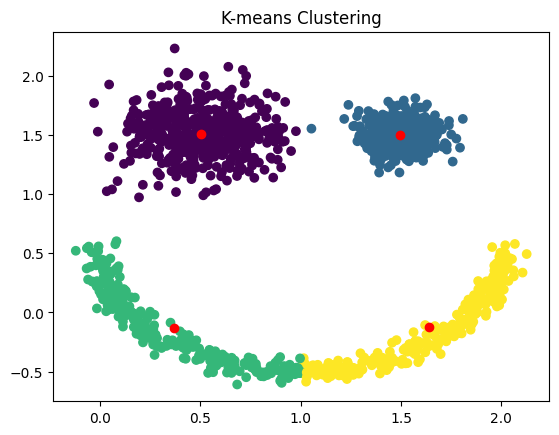

<Figure size 640x480 with 0 Axes>

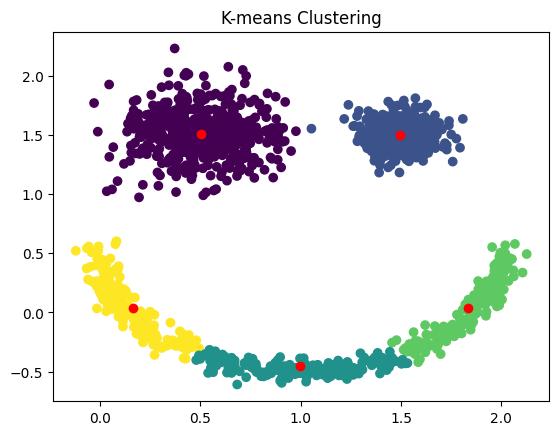

<Figure size 640x480 with 0 Axes>

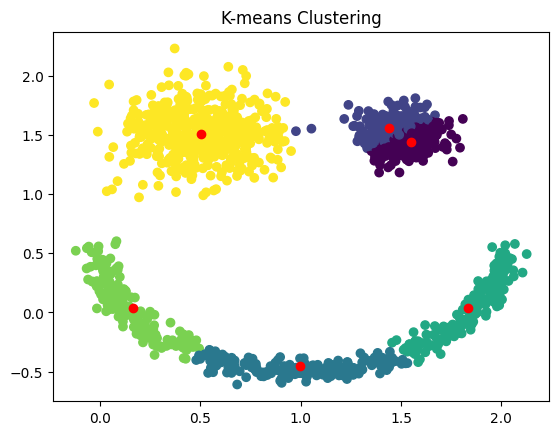

<Figure size 640x480 with 0 Axes>

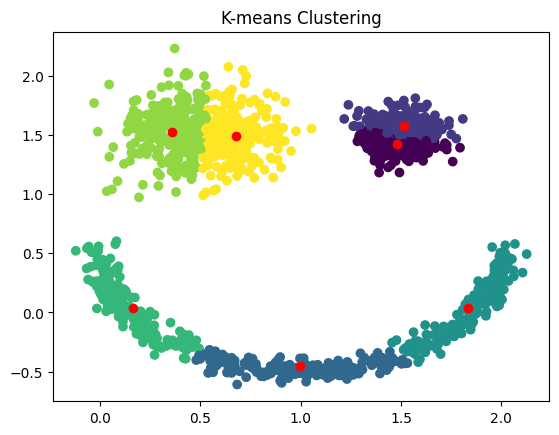

<Figure size 640x480 with 0 Axes>

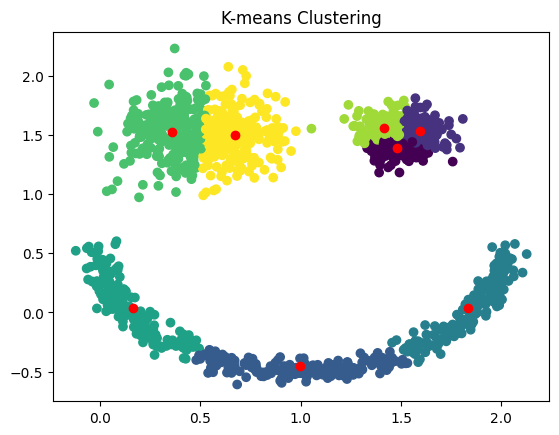

<Figure size 640x480 with 0 Axes>

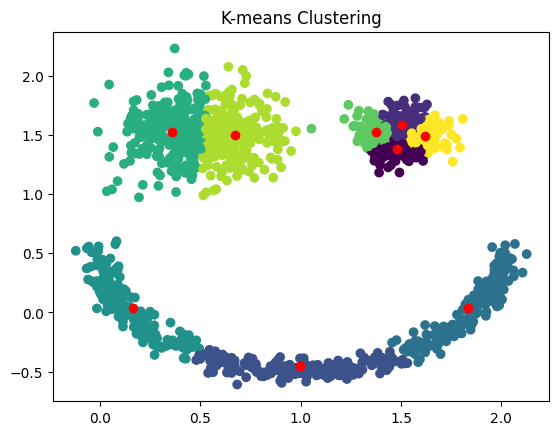

<Figure size 640x480 with 0 Axes>

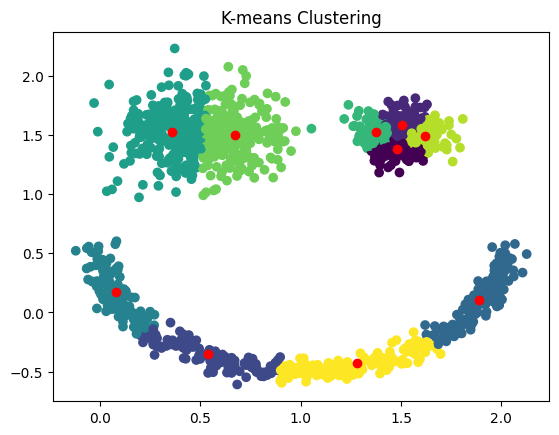

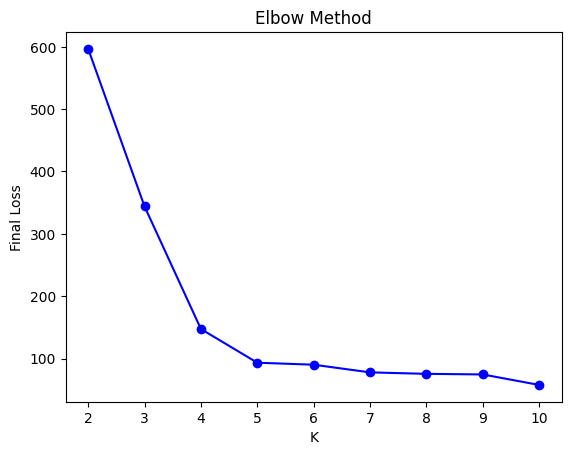

In [ ]:
K_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
losses = []

for K in K_values:
    centroids, labels, loss_history = kmeans(X, K)
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
    plt.title('K-means Clustering')
    plt.figure()
    losses.append(loss_history[-1])  # Final loss

plt.plot(K_values, losses, 'bo-')
plt.xlabel('K')
plt.ylabel('Final Loss')
plt.title('Elbow Method')

K=5 is good, as seen by the graph, the largest drop seems to happen there and the final loss seems to only get marginally better from there.

d. (1 point) Run K-means on the dataset created in HW1, utilizing only the numerical features. Perform feature normalization as appropriate before clustering. Select a suitable distance or similarity measure for the K-means algorithm. Plot the final loss value versus K. Based on the plot, choose an appropriate value for K. Perform clustering using the chosen K value and analyze the results.

Text(0, 0.5, 'petal width (cm)')

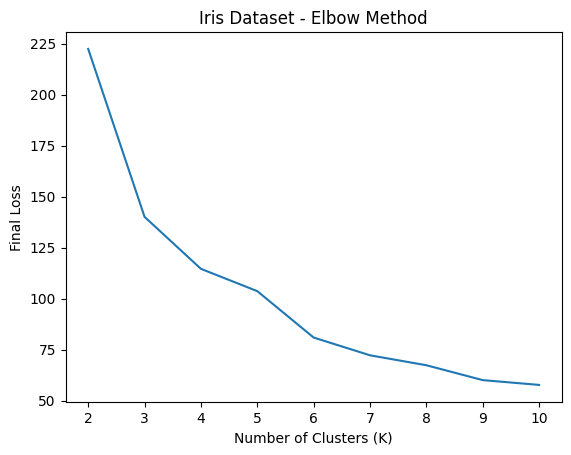

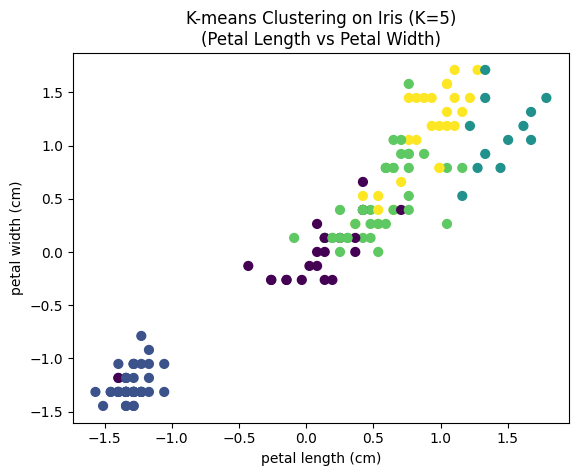

In [ ]:
# Run K-means on the dataset created in HW1, utilizing only the numerical features.
# Perform feature normalization as appropriate before clustering.
# Select a suitable distance or similarity measure for the K-means algorithm.
# Plot the final loss value versus K.
# Choose appropriate K, and analyze the result.
def kmeans(X, K, max_iters=25, seed=random_state):
    np.random.seed(seed)
    samp, throwaway = X.shape
    centroids = X[np.random.choice(samp, K, replace=False)]
    loss_history = []
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = []
        for k in range(K):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                new_centroids.append(centroids[k])
        new_centroids = np.array(new_centroids)
        loss = 0
        for i in range(samp):
            distance = np.linalg.norm(X[i] - centroids[labels[i]])
            loss += distance ** 2
        loss_history.append(loss)
        if np.linalg.norm(new_centroids - centroids) < (0.0001):
            break
        centroids = new_centroids
    return centroids, labels, loss_history
iris = load_iris()
X_iris = iris.data
scaler = StandardScaler()
X_norm, K_options, feature_names = scaler.fit_transform(X_iris), [2,3,4,5,6,7,8,9,10], iris.feature_names
iris_losses, iris_labels_all, iris_centroids_all = [], [], []
for K in K_options:
    centroids, labels, loss_history = kmeans(X_norm, K)
    iris_losses.append(loss_history[-1])
    iris_labels_all.append(labels)
    iris_centroids_all.append(centroids)
best_K = 5
labels_best = iris_labels_all[K_options.index(best_K)]
plt.figure()
plt.plot(K_options, iris_losses)
plt.title('Iris Dataset - Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Final Loss')
plt.figure()
plt.scatter(X_norm[:, 2], X_norm[:, 3], c=labels_best, cmap='viridis', s=40)
plt.title(f'K-means Clustering on Iris (K={best_K})\n(Petal Length vs Petal Width)')
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])

The K-means clustering algorithm, when applied to the Iris dataset using petal length and width, effectively separates data into distinct groups, with some overlap between clusters. This suggests that the algorithm successfully captures the known class structure of the Iris dataset, as the K-means clustering with Euclidean distance and normalized features produces well-separated groups that align with the true Iris species. Further analysis with K=5 might reveal additional groupings reflecting within-species variation.

## 2. Dimensionality reduction

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload the .zip file

import zipfile
import os

# Replace with your actual uploaded zip filename
zip_path = "lfwcrop_grey_faces.zip"
extract_path = "lfwcrop_grey_faces"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


Saving lfwcrop_grey_faces.zip to lfwcrop_grey_faces.zip


In [3]:
def load_face_data():
    data_dir = "lfwcrop_grey_faces"
    images = []
    #I CHANGED THIS OR ELSE MY PROGRAM WOULDN'T RUN
    #REFERENCE: https://stackoverflow.com/questions/22515756/using-os-walk-to-get-my-file-path-in-python
    #REFERENCE: https://lippincottlibrary.wordpress.com/2020/02/05/python-find-files-with-os-walk/
    for root, dirs, files in os.walk(data_dir):
        for filename in sorted(files):
            if filename.endswith('.pgm'):
                file_path = os.path.join(root, filename)
                try:
                    img = Image.open(file_path)
                    images.append(np.array(img))
                except Exception as e:
                    print(f"Skipping {file_path} due to error: {e}")
    '''
    for filename in os.listdir(data_dir):
        image = np.array(Image.open(os.path.join(data_dir, filename)))
        images.append(image)
    images = np.array(images)
    X = images.reshape(images.shape[0], images.shape[1]*images.shape[2])
    '''
    images = np.array(images)
    X = images.reshape(images.shape[0], -1)

    # Train-val split
    X_train, X_val = train_test_split(X, test_size=0.2, random_state=random_state, shuffle=True)
    X_train = np.array(X_train / 255, dtype='float32')
    X_val = np.array(X_val / 255, dtype='float32')

    print('Total number of images: {}'.format(len(images)))
    print(f"X_train shape: {X_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    #I ADDED ANOTHER PARAMETER SINCE EXTRACTION
    return X_train, X_val, images.shape[1:]

In [4]:
X_train, X_val, face_shape = load_face_data()
#I CHANGED THIS AS THERE ARE NOW 3 PARAMETERS

Total number of images: 13233
X_train shape: (10586, 4096)
X_val shape: (2647, 4096)


a. (1 point) Implement PCA from scratch. Note that implemented PCA functions, such as sklearn.decomposition.PCA cannot be used for this question. The input of your PCA function is the data matrix, the percentage of total variance to preserve, and the output is the PCA transformation matrix.

In [5]:
def PCA(X_train, keep_variance_percent):
    X_centered = X_train - np.mean(X_train, axis=0)
    eig_vals, eig_vecs = np.linalg.eigh(np.cov(X_centered, rowvar=False))# NEED rowvar=False or will take forever to run
    sorted_idx = np.argsort(eig_vals)[::-1]
    eig_vecs = eig_vecs[:, sorted_idx]
    selected_vectors = []
    total_var = np.sum(eig_vals[sorted_idx])
    running_var = np.cumsum(eig_vals[sorted_idx]) / total_var
    num_comp = np.searchsorted(running_var, keep_variance_percent) + 1
    for i in range(num_comp):
        selected_vectors.append(eig_vecs[:, i])  #ith col eigenvector
    proj_mat = np.column_stack(selected_vectors)
    return proj_mat, num_comp#WE ADDED num_comp as needed later
#REFERENCE: https://samueladebayo.com/understanding-principal-component-analysis-pca-a-comprehensive-guide
#REFERENCE: https://stackoverflow.com/questions/1730600/principal-component-analysis-in-python

In [6]:
# TESTING
projection_matrix, num_components = PCA(X_train, keep_variance_percent=0.90)
print("Number of components to retain 90% variance:", num_components,"\nProjection matrix shape:", projection_matrix.shape)

Number of components to retain 90% variance: 87 
Projection matrix shape: (4096, 87)


b. (1 point) Train the PCA on the training dataset. Keep enough components to explain at least 90% of the total variance. After implementing PCA, plot the eigenfaces, which are the eigenvectors corresponding to the largest eigenvalues.

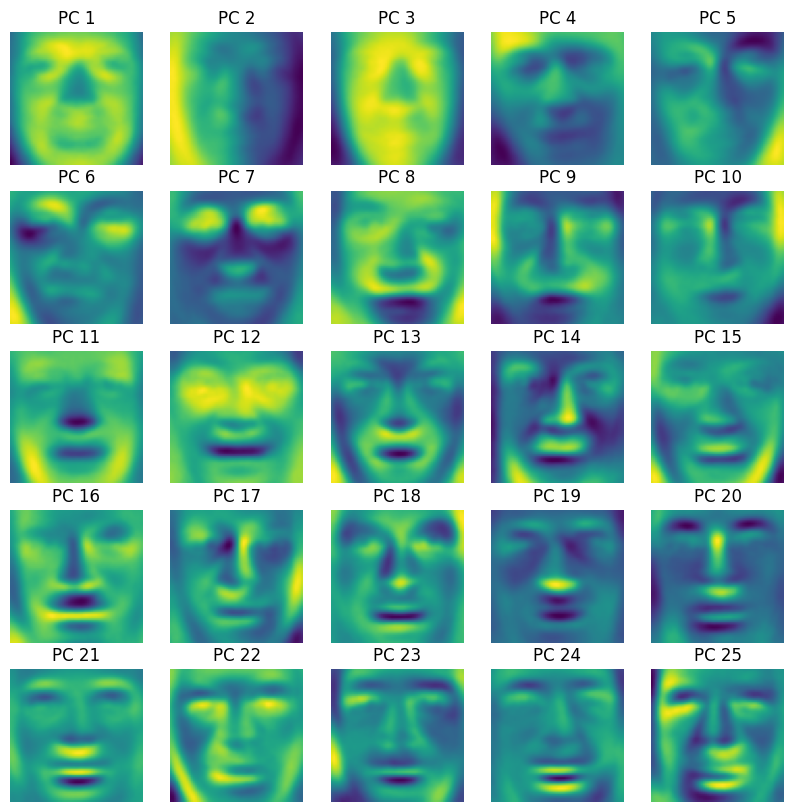

In [7]:
def plot_eigenfaces(projection_matrix, face_shape, num_faces=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_faces):
        plt.subplot(int(np.ceil(np.sqrt(num_faces))), int(np.ceil(np.sqrt(num_faces))), i + 1)
        face = projection_matrix[:, i].reshape(face_shape)
        plt.imshow(face)
        plt.axis('off')
        plt.title("PC " + str(i + 1))
plot_eigenfaces(projection_matrix, face_shape)


c. (1 point) Project the validation subset onto the learned components to realize dimensionality reduction (i.e., compression). Reconstruct the faces from the compressed representations and report the reconstruction mean squared error (MSE). Visualize the original image vs the reconstructed image for several pictures.

Reconstruction Mean Squared Error (MSE): 0.0027013613164543785


Text(0.5, 0.98, 'PCA: Original vs Reconstructed Faces')

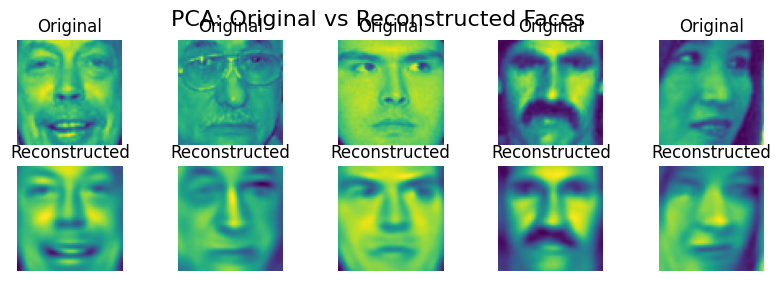

In [9]:
X_val_reconstructed = np.dot(np.dot(X_val - np.mean(X_train, axis=0), projection_matrix), projection_matrix.T) + np.mean(X_train, axis=0)
print("Reconstruction Mean Squared Error (MSE):", mean_squared_error(X_val, X_val_reconstructed))
n = 5
plt.figure(figsize=(10, 3))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_val[i].reshape(face_shape))
    plt.title("Original")
    plt.axis('off')
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_val_reconstructed[i].reshape(face_shape))
    plt.title("Reconstructed")
    plt.axis('off')
plt.suptitle("PCA: Original vs Reconstructed Faces", fontsize=16)

d. (1 point) Implement an autoencoder in PyTorch. The input consists of flattened grayscale images of size (1, 64 x 64). The encoder starts with a linear layer containing 1024 neurons, followed by BatchNorm1d and ReLU activation. The next layer (bottleneck layer) in the encoder has the same number of neurons as the principal components you choose in b), also followed by BatchNorm1d and ReLU activation. The decoder has a linear layer with 1024 neurons with BatchNorm1d and ReLU activation. Finally, the last layer in the decoder is a linear layer with 64x64 neurons followed by BatchNorm1d and Sigmoid activation.

In [10]:
class FaceAutoencoder(nn.Module):
    def __init__(self, bottleneck_dim):
        super().__init__()
        self.enc_fc1 = nn.Linear(4096, 1024)
        self.enc_bn1 = nn.BatchNorm1d(1024)
        self.enc_fc2 = nn.Linear(1024, bottleneck_dim)
        self.enc_bn2 = nn.BatchNorm1d(bottleneck_dim)
        self.dec_fc1 = nn.Linear(bottleneck_dim, 1024)
        self.dec_bn1 = nn.BatchNorm1d(1024)
        self.dec_fc2 = nn.Linear(1024, 4096)
        self.dec_bn2 = nn.BatchNorm1d(4096)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.relu(self.enc_bn1(self.enc_fc1(x)))
        x = self.relu(self.enc_bn2(self.enc_fc2(x)))
        x = self.relu(self.dec_bn1(self.dec_fc1(x)))
        x = self.sigmoid(self.dec_bn2(self.dec_fc2(x)))
        return x


e. (1.5 points) Train the autoencoder using the training subset with MSE loss, Adam optimizer and learning rate of 0.001. Set an appropriate batch size and training epochs that fit to your computational resources. After training the autoencoder, extract the encoder part of the network, which maps the input to the compressed representation. Use this encoder to map images in the validation subset to the compressed representation and then use the decoder to reconstruct the original images. Calculate the reconstruction MSE for the validation data and compare it with the PCA reconstruction MSE. Visualize the original image vs the reconstructed image for several pictures.

Epoch 0.05  Loss: {0.021531149655221456}
Epoch 0.1  Loss: {0.013905521706644311}
Epoch 0.15  Loss: {0.011149056300700429}
Epoch 0.2  Loss: {0.009318738323019212}
Epoch 0.25  Loss: {0.008032904831266188}
Epoch 0.3  Loss: {0.00699371832748314}
Epoch 0.35  Loss: {0.006114143771624349}
Epoch 0.4  Loss: {0.005519428941230458}
Epoch 0.45  Loss: {0.005172103531209819}
Epoch 0.5  Loss: {0.004915329840887024}
Epoch 0.55  Loss: {0.00473708750859621}
Epoch 0.6  Loss: {0.0045677542248853}
Epoch 0.65  Loss: {0.004452207989721413}
Epoch 0.7  Loss: {0.004363358295690942}
Epoch 0.75  Loss: {0.004216269601181329}
Epoch 0.8  Loss: {0.004108809198376285}
Epoch 0.85  Loss: {0.004039808866534248}
Epoch 0.9  Loss: {0.003945703200255352}
Epoch 0.95  Loss: {0.0038769393626331204}
Epoch 1.0  Loss: {0.0038058428004024976}
Autoencoder Reconstruction MSE: 0.0048297555185854435


Text(0.5, 0.98, 'Original vs Reconstructed')

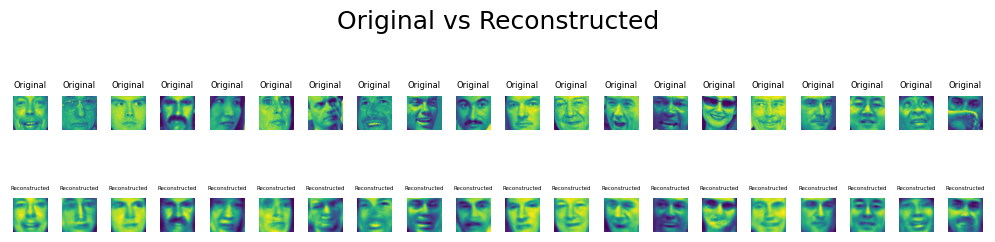

In [26]:
X_train_tensor, X_val_tensor = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_val, dtype=torch.float32)
train_dataset = TensorDataset(X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
#REFERENCE: https://medium.com/@outerrencedl/variational-autoencoder-and-a-bit-kl-divergence-with-pytorch-ce04fd55d0d7
model = FaceAutoencoder(bottleneck_dim=num_components).to("cuda")
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()
for epoch in range(20):
    epoch_loss = 0
    for batch in train_loader:
        inputs = batch[0].to("cuda")
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, inputs)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print("Epoch", (epoch+1)/(20), " Loss:", {epoch_loss / len(train_loader)})
model.eval()
#REFERENCE: https://discuss.huggingface.co/t/model-is-not-properly-moved-to-gpu-memory-with-torch-no-grad/22031
with torch.no_grad():
    val_inputs = X_val_tensor.to("cuda")
    val_outputs = model(val_inputs).cpu().numpy()
mse_autoencoder = mean_squared_error(X_val, val_outputs)
print("Autoencoder Reconstruction MSE:", mse_autoencoder)
plt.figure(figsize=(10, 3))
for i in range(20):
    plt.subplot(2, 20, i + 1)
    plt.imshow(X_val[i].reshape(face_shape))
    plt.title("Original",fontsize=6)
    plt.axis('off')
    plt.subplot(2, 20, i + 21)
    plt.imshow(val_outputs[i].reshape(face_shape))
    plt.title("Reconstructed",fontsize=4)
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.suptitle("Original vs Reconstructed", fontsize=18)
#REFERENCE: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
#Reference: https://github.com/QingleCheng/EEWnet/blob/main/EEWnet.py
#REFERENCE: https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/

f. (1 point) Finally, visualize the weights of the first layer of the encoder, which can
be interpreted as the most important patterns in the data. Compare the
eigenfaces in PCA with the weights learned in autoencoder and describe your
findings

Text(0.5, 0.98, 'Patterns by Encoder')

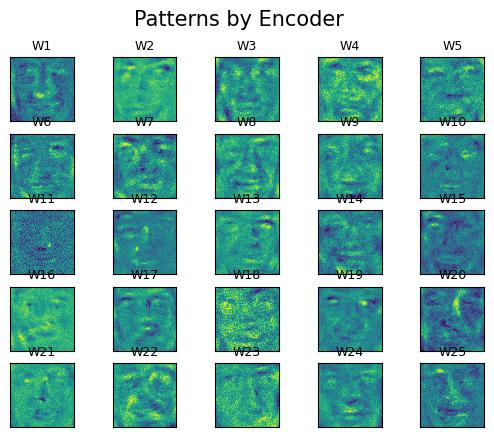

In [27]:
weights = model.enc_fc1.weight.detach().cpu().numpy()
num_to_display = 25
plt.figure()
for i in range(num_to_display):
    k = plt.subplot(5, 5, i + 1)
    k.imshow(weights[i].reshape(face_shape))
    k.set_xticks([])
    k.set_yticks([])
    k.set_title("W" + str(i + 1), fontsize=9)
plt.suptitle("Patterns by Encoder", fontsize=15)

The first encoder layer’s weights act like localized “filters” that, much like PCA eigenfaces, capture foundational patterns in face images—but thanks to nonlinear activations, the autoencoder learns richer, more complex features. Visually, both PCA and autoencoder filters emphasize key regions such as the eyes, mouth, and cheek contours, yet the autoencoder hones in on subtler, more abstract details. In essence, PCA offers a clear linear baseline, while the autoencoder’s adaptive features deliver lower reconstruction error and finer detail preservation.